# 고객 이탈 예측 실습 과제

이 노트북은 통신사 고객 이탈 예측 문제를 해결하기 위한 머신러닝 실습 과제입니다.  
의사결정트리(Decision Tree)와 서포트 벡터 머신(SVM)을 활용하며, 의사결정트리는 시각화도 함께 진행합니다.

---

## 📂 데이터셋 다운로드 방법
1. [Kaggle Telco Customer Churn Dataset 링크](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)에 접속합니다.
2. `Download` 버튼을 클릭해 데이터셋을 내려받습니다.
3. 압축을 해제하고 `WA_Fn-UseC_-Telco-Customer-Churn.csv` 파일을 현재 노트북과 같은 폴더에 둡니다.

---

## 🧪 실습 과제 목록


### 🧩 1. 데이터 불러오기 및 확인
- `WA_Fn-UseC_-Telco-Customer-Churn.csv` 파일을 불러오고 `head()`로 데이터를 확인하세요.

In [38]:
import pandas as pd
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 🧩 2. 데이터 전처리
- TotalCharges가 문자열로 되어 있는 문제를 해결하고, 결측값을 처리하세요.
- `Churn` 컬럼을 0과 1로 변환하고, `customerID` 컬럼을 제거하세요.
- 범주형 변수들을 원핫 인코딩 처리하세요.
- 훈련용과 테스트용 데이터로 7:3 비율로 분리하세요.

In [39]:
# 2. 전처리
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace=True)
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})
data.drop(columns=['customerID'], inplace=True)
data = pd.get_dummies(data)

In [40]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Churn'])
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 🧩 3. 의사결정트리 모델링 및 시각화
- `DecisionTreeClassifier`를 사용하여 훈련 데이터를 학습하세요.
- `plot_tree()`를 사용하여 트리를 시각화하세요.
- 주요 분기 기준을 해석해보세요.

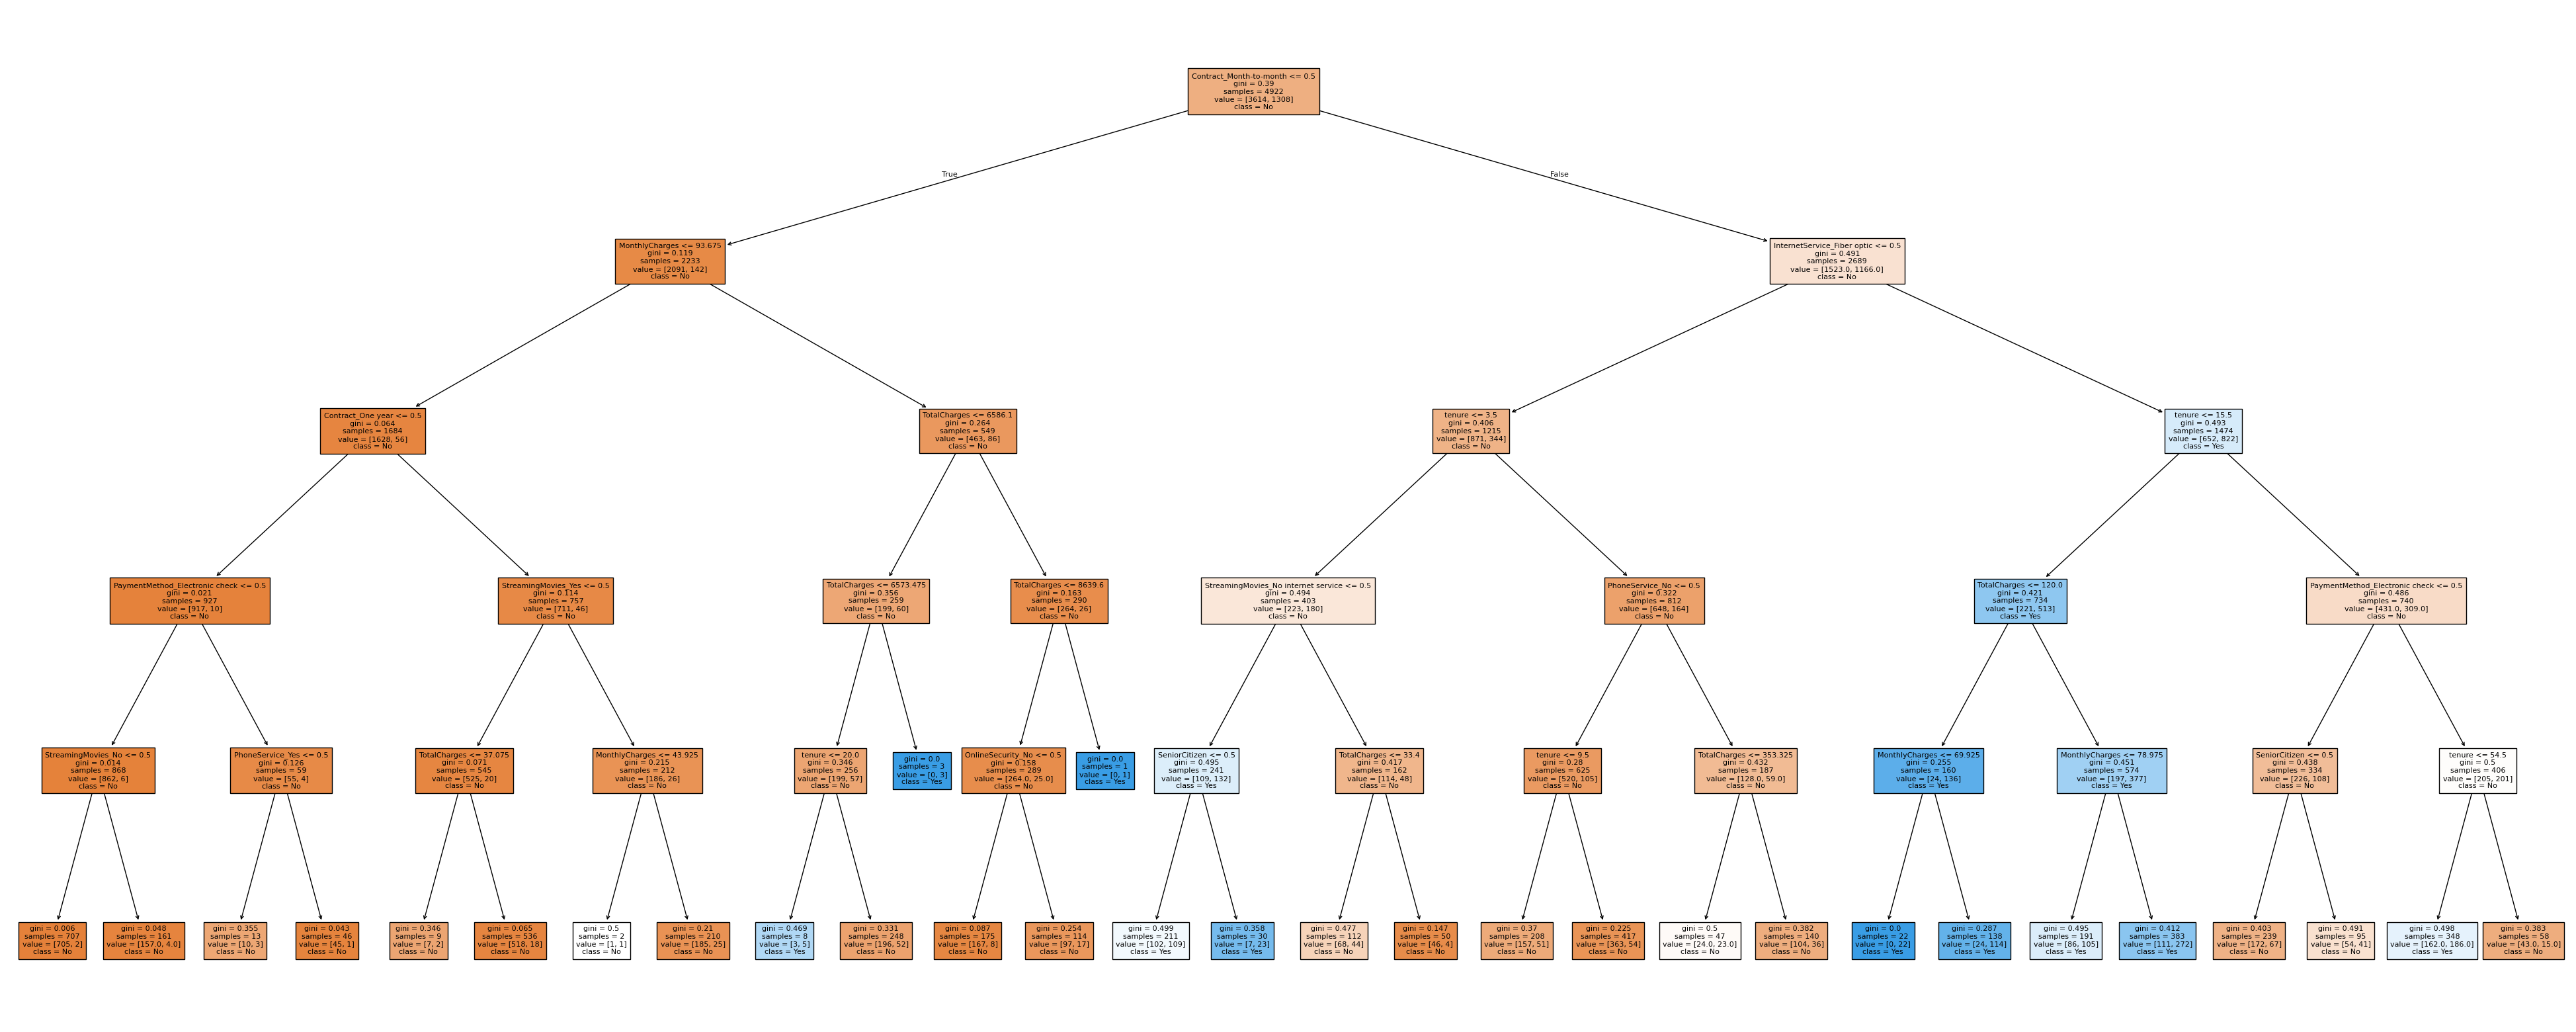

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

plt.figure(figsize=(50, 20))
plot_tree(dt_model, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True, fontsize=8)
plt.show()

### 🧩 4. SVM 모델링
- `SVC` 모델을 이용해 이탈 여부를 예측하세요.
- 테스트셋에 대한 예측 결과를 출력하고, `classification_report`를 사용해 평가하세요.

In [43]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42, class_weight='balanced')  # class imbalance 보정
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

### 🧩 5. 모델 성능 비교
- 의사결정트리와 SVM의 평가 지표(`정확도`, `정밀도`, `재현율`)를 비교하세요.
- 어떤 모델이 어떤 상황에서 더 적합한지 분석해보세요.

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

y_pred_dt = dt_model.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

print("=== 모델 성능 비교 ===")
print(f"▶ Decision Tree - 정확도: {acc_dt:.4f}, 정밀도: {prec_dt:.4f}, 재현율: {recall_dt:.4f}")
print(f"▶ SVM           - 정확도: {acc_svm:.4f}, 정밀도: {prec_svm:.4f}, 재현율: {recall_svm:.4f}")

# 선택적으로 classification_report 전체 보기
print("\n[Decision Tree]\n", classification_report(y_test, y_pred_dt))
print("\n[SVM]\n", classification_report(y_test, y_pred_svm))

=== 모델 성능 비교 ===
▶ Decision Tree - 정확도: 0.7815, 정밀도: 0.5853, 재현율: 0.6114
▶ SVM           - 정확도: 0.7389, 정밀도: 0.5058, 재현율: 0.7772

[Decision Tree]
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1549
           1       0.59      0.61      0.60       561

    accuracy                           0.78      2110
   macro avg       0.72      0.73      0.72      2110
weighted avg       0.78      0.78      0.78      2110


[SVM]
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1549
           1       0.51      0.78      0.61       561

    accuracy                           0.74      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.80      0.74      0.75      2110



Decision Tree는 간단한 구조와 해석 가능성으로 장점이 있으며, 비교적 균형 잡힌 예측 성능을 보여준다. 반면, SVM은 데이터 스케일링과 클래스 가중치 조정 없이 사용할 경우 이탈 고객을 거의 예측하지 못하는 문제가 발생했다.

개선된 SVM (StandardScaler + class_weight='balanced')은 불균형 문제를 어느 정도 보완했으며, 예측 정확도보다 재현율을 높이는 데 중점을 둘 수 있다.

Churn prediction 에서는 Recall이 중요한 경우가 많기 때문에, Decision Tree나 개선된 SVM 모두 상황에 따라 적절히 사용할 수 있다.


### 🧩 6. 사용자 입력 기반 예측 (선택)
- 새로운 고객의 정보를 입력받아 모델이 이탈 가능성을 예측하도록 구성해보세요.

In [ ]:
# 예시 입력

sample = X_test.iloc[0:1]

print("sample = ", sample)

# 예측 결과
pred_dt = dt_model.predict(sample)[0]
pred_svm = svm_model.predict(sample)[0]
print(f"Decision Tree 예측 결과: {'Churn' if pred_dt == 1 else 'Not Churn'}")
print(f"SVM 예측 결과: {'Churn' if pred_svm == 1 else 'Not Churn'}")

sample =        SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Female  \
2481              1      61            25.0       1501.75          False   

      gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
2481         True       False         True           True           False   

      ...  StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
2481  ...                False                    False              False   

      Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
2481               True                 True                 False   

      PaymentMethod_Bank transfer (automatic)  \
2481                                     True   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
2481                                  False                           False   

      PaymentMethod_Mailed check  
2481                       False  

[1 rows x 45 columns]
Not Churn
Not Churn


c:\Users\wjdgn\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


: 

# 부록: 의사결정트리 시각화 예제(iris dataset)

In [45]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [46]:
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



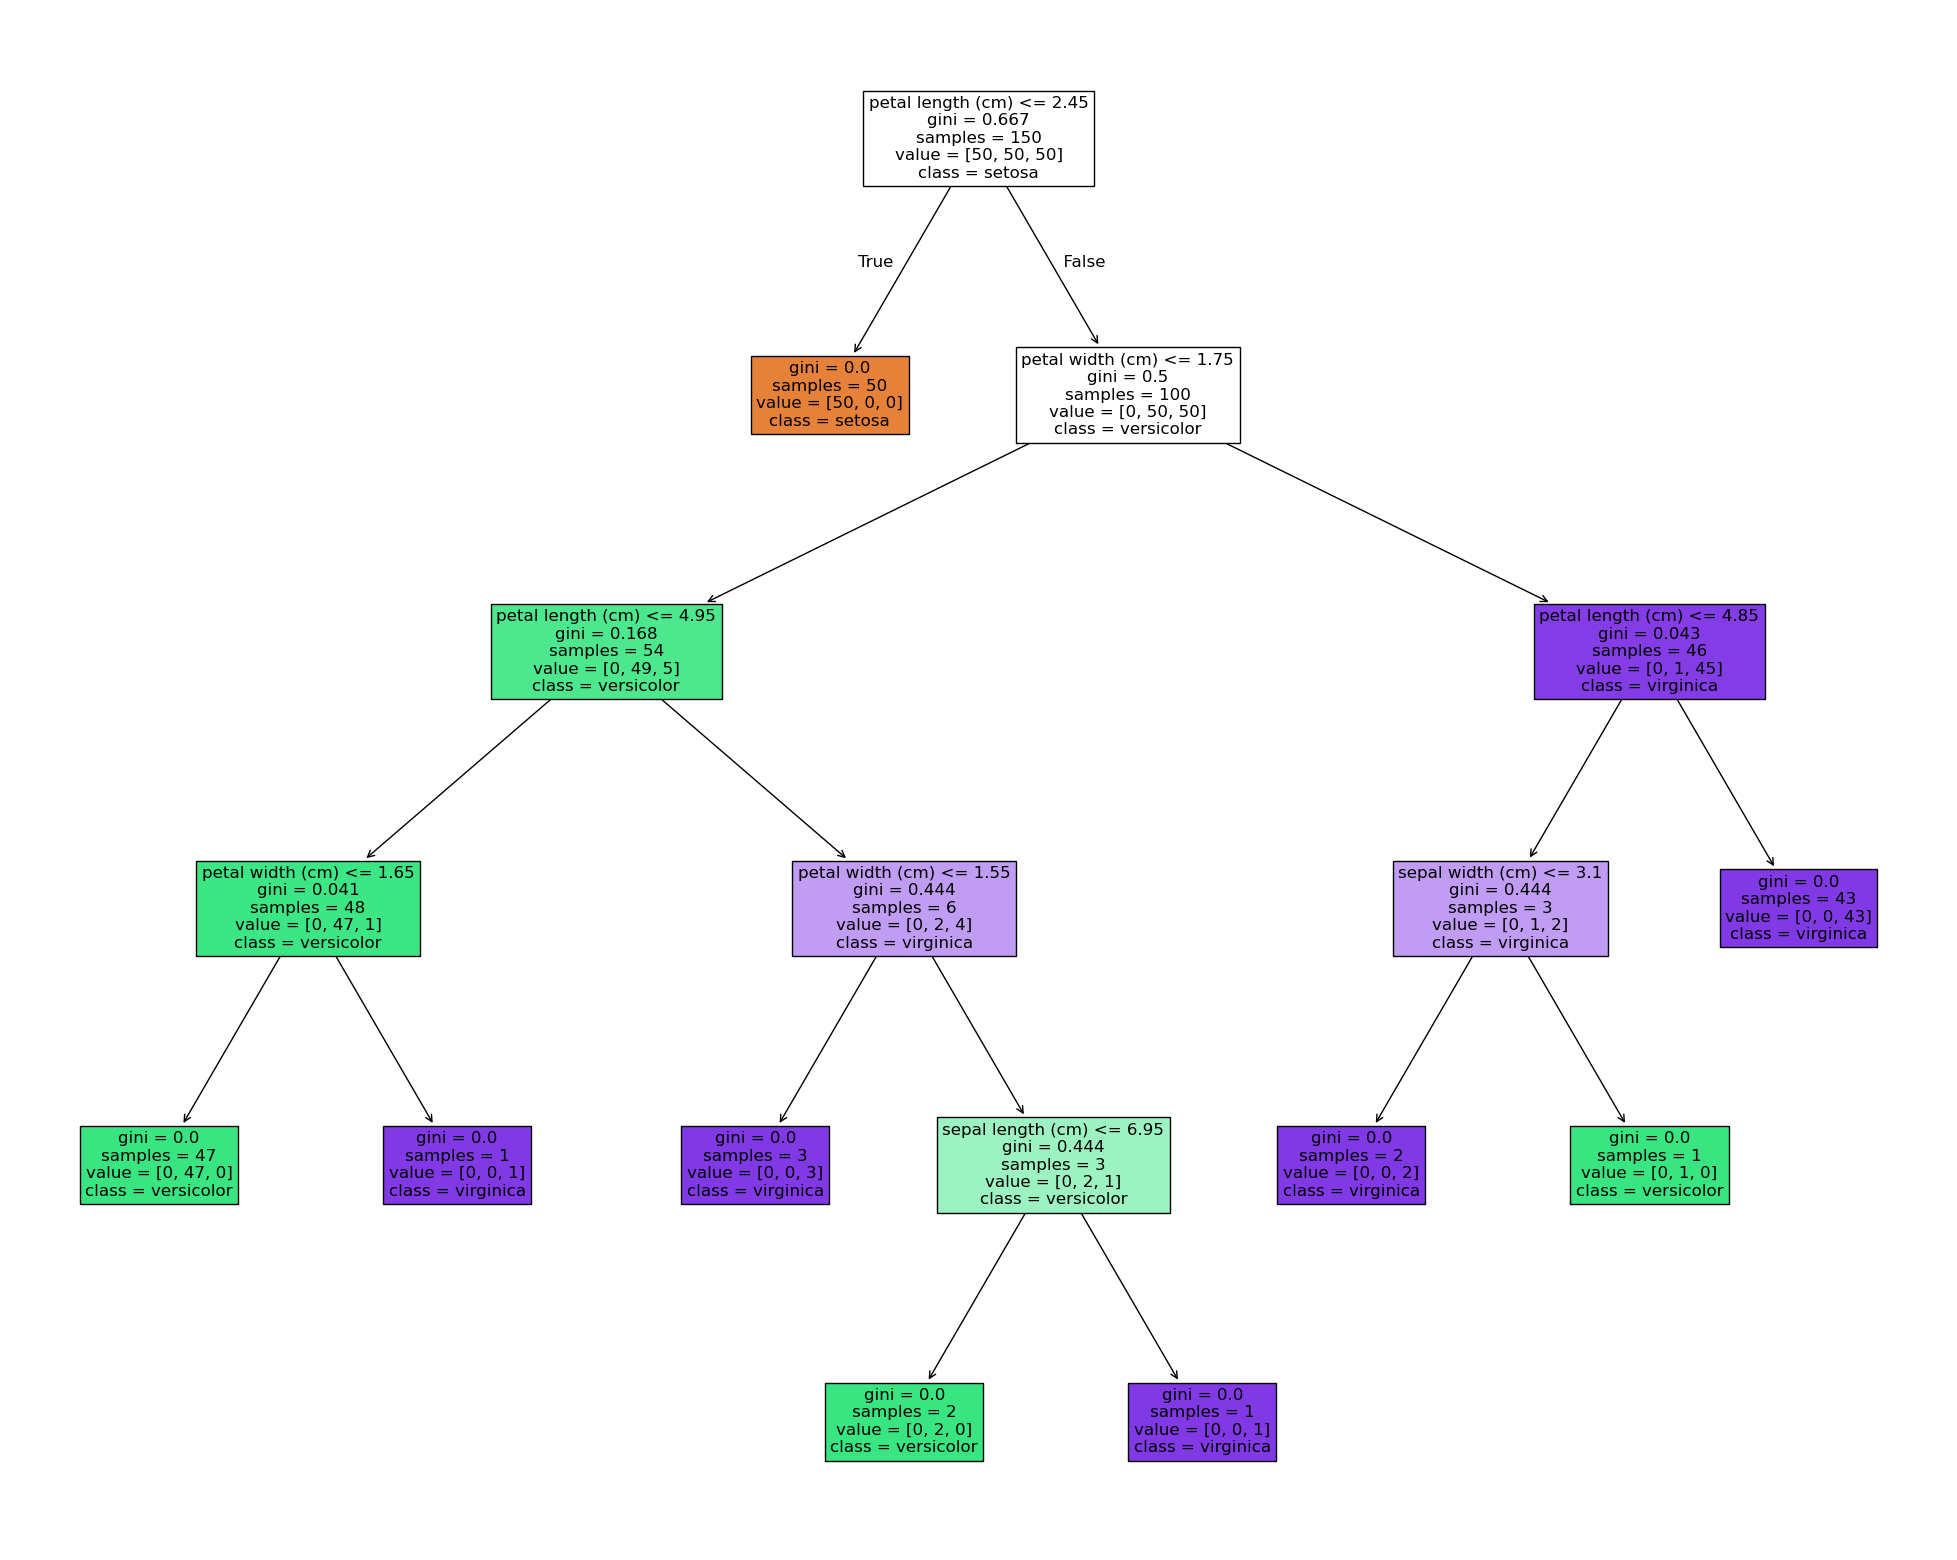

In [47]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True,
                   fontsize=12)